In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [3]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)

In [6]:
num_features = features.select_dtypes(include=['int64','float64'])
cat_features = features.select_dtypes(include=['object'])

In [ ]:
# here, use LabelEncoder to look at vif
# is it better to use get dummies for the actual modeling?
# what about OneHotEncoder?

In [7]:
from sklearn.preprocessing import LabelEncoder
cat_features_encoded = cat_features.apply(LabelEncoder().fit_transform)
cat_features_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,5,1,1,3,3,0,0,0,21,2,2,0,2,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,4,4,6,2,5,3,5,5,2,3,4,1,9,4
1,5,1,1,3,3,0,4,0,7,2,2,4,2,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4
2,1,1,1,3,3,0,4,0,11,2,2,0,2,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,4,2,6,3,5,3,5,4,0,3,4,1,9,4
3,5,1,1,3,3,0,0,0,20,2,2,0,5,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,4,4,6,3,5,3,5,5,0,3,4,1,9,4
4,5,1,1,3,3,0,4,0,17,2,2,0,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4


In [8]:
features_encoded = pd.concat([num_features, cat_features_encoded], axis = 1)

In [14]:
features_encoded.shape

(2580, 79)

In [9]:
features_encoded.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,5,1,1,3,3,0,0,0,21,2,2,0,2,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,4,4,6,2,5,3,5,5,2,3,4,1,9,4
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,5,1,1,3,3,0,4,0,7,2,2,4,2,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,1,1,1,3,3,0,4,0,11,2,2,0,2,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,4,2,6,3,5,3,5,4,0,3,4,1,9,4
3,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,5,1,1,3,3,0,0,0,20,2,2,0,5,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,4,4,6,3,5,3,5,5,0,3,4,1,9,4
4,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,5,1,1,3,3,0,4,0,17,2,2,0,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,4,2,6,3,1,0,5,5,2,3,4,1,9,4


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = features_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(features_encoded.values, i)
                          for i in range(len(features_encoded.columns))]
vif_data

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,GrLivArea,inf
1,MSSubClass,1.387299e+01
2,LotFrontage,9.097539e+00
3,LotArea,6.843657e+00
4,OverallQual,7.479468e+01
5,OverallCond,5.008474e+01
6,YearBuilt,3.763034e+04
7,YearRemodAdd,2.464898e+04
8,MasVnrArea,2.306206e+00
9,BsmtFinSF1,inf


In [ ]:
# look for strong correlation
# also for multicollinearity 

In [11]:
corrmatrix = housing.corr()
sorted_corrs = corrmatrix['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_25545/3466585229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = housing.corr()


SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638785
GarageArea       0.634976
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.532087
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
LotFrontage      0.208847
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
EnclosedPorch    0.123235
ScreenPorch      0.121463
KitchenAbvGr     0.113977
OverallCond      0.101091
MSSubClass       0.084587
BsmtHalfBath     0.033786
3SsnPorch        0.031260
PoolArea         0.030844
LowQualFinSF     0.030835
BsmtFinSF2       0.022668
MiscVal          0.018877
MoSold           0.012591
YrSold           0.001376
Name: SalePrice, dtype: float64

In [94]:
strong_corrs.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'FullBath', 'GarageYrBlt',
       'YearRemodAdd', 'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces',
       'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'HalfBath',
       'LotArea', '2ndFlrSF'],
      dtype='object')

<Axes: >

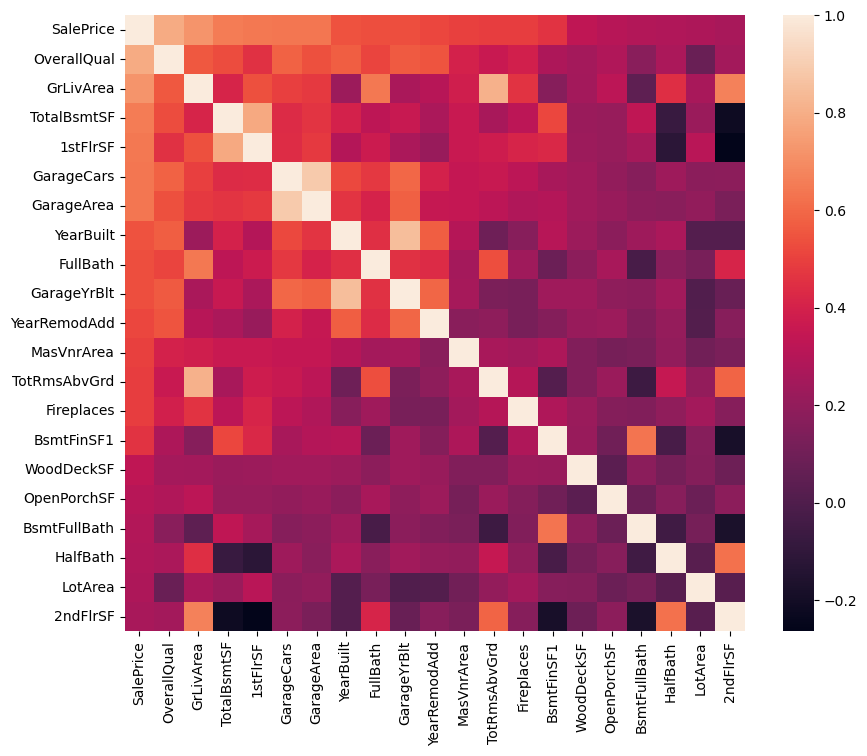

In [13]:
strong_corrs=sorted_corrs[sorted_corrs>.25] # define threshold for strong correlation
corrmatrix=housing[strong_corrs.index].corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,ax=ax)

In [87]:
corrmatrix[corrmatrix>.6]

,SalePrice,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,GarageYrBlt,YearRemodAdd,MasVnrArea,TotRmsAbvGrd,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF
SalePrice,1.000000,0.790501,0.719981,0.652494,0.642613,0.638785,0.634976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,0.790501,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,0.719981,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.643937,NaN,NaN,NaN,0.807445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.665001
TotalBsmtSF,0.652494,NaN,NaN,1.000000,0.784271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,0.642613,NaN,NaN,0.784271,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,0.638785,NaN,NaN,NaN,NaN,1.000000,0.889603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,0.634976,NaN,NaN,NaN,NaN,0.889603,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.850812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,0.643937,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850812,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# possibly multicollinear (> .6)

# YearBuilt / GarageYrBlt
# GrLivArea / TotRmsAbvGrd 
# GrLivArea / FullBath
# GarageArea / GarageCars
# 1stFlrSF / TotalBsmtSF
# 2ndFlrSF / GrLivArea / 
# 2ndFlrSF / HalfBath
# BsmtFinSF1 / BsmtFullBath

# remove GarageYrBlt, TotRmsAbvGrd, FullBath, GarageCars, TotalBsmtSF, 2ndFlrSF, BsmtFullBath

In [31]:
num_features_reduced = features[strong_corrs.index[1:,]].drop(
    ['GarageYrBlt', 'TotRmsAbvGrd', 'FullBath', 'GarageCars', 'TotalBsmtSF', 
     '2ndFlrSF', 'BsmtFullBath'], axis = 1)
num_features_reduced.head()

,OverallQual,GrLivArea,1stFlrSF,GarageArea,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,HalfBath,LotArea
0,6,856,856,399.0000,1939,1950,0.0000,1,238.0000,0,0,0,7890
1,5,1049,1049,266.0000,1984,1984,149.0000,0,552.0000,0,105,0,4235
2,5,1001,1001,216.0000,1930,2007,0.0000,0,737.0000,154,0,0,6060
3,4,1039,717,281.0000,1900,2003,0.0000,0,0.0000,0,0,0,8146
4,8,1665,810,528.0000,2001,2001,0.0000,0,643.0000,0,45,1,8400


In [15]:
# 'correlation' between catergorical variables

import association_metrics as am

# convert columns to Category columns
categorical_vars = cat_features.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

# return matrix with Cramer's V values
cramersv = am.CramersV(categorical_vars) 
cat_corr_matrix = cramersv.fit()
cat_corr_matrix

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSZoning,1.000000,0.318137,0.411805,0.162606,0.090153,0.499667,0.082268,0.042336,0.542126,0.095119,0.039203,0.200101,0.160086,0.076873,0.029204,0.336129,0.178837,0.113557,0.215374,0.120662,0.218262,0.230085,0.110600,0.114227,0.137969,0.083094,0.044881,0.127652,0.268942,0.138871,0.143504,0.114302,0.111284,0.181092,0.204371,0.146188,0.123854,0.241171,0.015789,0.059754,0.031361,0.110122,0.096156
Street,0.318137,1.000000,0.016463,0.031466,0.098335,0.222391,0.020743,0.097552,0.228929,0.191412,0.006170,0.069881,0.043506,0.016445,0.007420,0.072763,0.063027,0.068957,0.168980,0.039303,0.104474,0.072369,0.065199,0.058477,0.041547,0.067121,0.007828,0.068550,0.060722,0.012032,0.060959,0.045490,0.030610,0.133086,0.046901,0.047561,0.052991,0.087097,0.003691,0.019985,0.057093,0.127491,0.156763
Alley,0.411805,0.016463,1.000000,0.091682,0.057546,0.007351,0.071610,0.020208,0.481047,0.098413,0.018460,0.180943,0.152380,0.084184,0.022978,0.201953,0.201860,0.109656,0.106574,0.078572,0.217224,0.148165,0.082528,0.101790,0.148685,0.056038,0.091163,0.084119,0.136653,0.158584,0.091915,0.086940,0.091572,0.202655,0.144696,0.134012,0.129384,0.193786,0.011041,0.038630,0.034120,0.077113,0.063473
LotShape,0.162606,0.031466,0.091682,1.000000,0.112477,0.010695,0.225985,0.104391,0.277205,0.124831,0.059007,0.087945,0.114739,0.044512,0.047436,0.127373,0.139346,0.088197,0.128457,0.048038,0.137900,0.171963,0.069228,0.125423,0.111664,0.061476,0.047861,0.082179,0.116709,0.098682,0.111930,0.032612,0.134241,0.171917,0.167122,0.100826,0.087387,0.115532,0.018336,0.059187,0.024440,0.055729,0.038562
LandContour,0.090153,0.098335,0.057546,0.112477,1.000000,0.068597,0.057461,0.434759,0.362525,0.063016,0.079443,0.072304,0.122458,0.143197,0.162483,0.129006,0.125169,0.081028,0.114367,0.038326,0.098556,0.122704,0.063425,0.183740,0.100477,0.062818,0.028168,0.058835,0.130682,0.064723,0.105207,0.074870,0.094507,0.097635,0.091269,0.062576,0.038706,0.068319,0.098879,0.046002,0.025351,0.042662,0.038861
Utilities,0.499667,0.222391,0.007351,0.010695,0.068597,1.000000,0.076842,0.006205,0.096475,0.055689,0.002755,0.012647,0.027896,0.022916,0.003313,0.082333,0.107043,0.022286,0.127317,0.091564,0.031304,0.083098,0.081806,0.081024,0.084764,0.081254,0.003495,0.042783,0.050011,0.105538,0.026422,0.124838,0.020876,0.015836,0.032003,0.009483,0.008588,0.046453,0.001648,0.014078,0.071498,0.145566,0.007304
LotConfig,0.082268,0.020743,0.071610,0.225985,0.057461,0.076842,1.000000,0.075119,0.184588,0.126628,0.061717,0.090925,0.074095,0.058640,0.067799,0.087992,0.143242,0.054928,0.053827,0.047166,0.064131,0.100239,0.050282,0.079475,0.081280,0.045561,0.035198,0.046446,0.090586,0.042385,0.035364,0.039269,0.067387,0.077954,0.074223,0.046974,0.057683,0.059581,0.031152,0.054843,0.020947,0.063516,0.039625
LandSlope,0.042336,0.097552,0.020208,0.104391,0.434759,0.006205,0.075119,1.000000,0.301300,0.050537,0.015268,0.043005,0.070564,0.255644,0.310116,0.113963,0.109742,0.056234,0.049879,0.041411,0.043469,0.038152,0.119250,0.206284,0.076768,0.093099,0.078006,0.052025,0.028078,0.014043,0.045029,0.079163,0.068681,0.073219,0.027557,0.024141,0.021903,0.010191,0.045561,0.033397,0.043455,0.031888,0.057553
Neighborhood,0.542126,0.228929,0.481047,0.277205,0.362525,0.096475,0.184588,0.301300,1.000000,0.214779,0.124355,0.443402,0.305337,0.232508,0.154010,0.318175,0.366033,0.368864,0.487062,0.186062,0.436784,0.433943,0.167960,0.276925,0.315246,0.186384,0.106841,0.308957,0.367743,0.201060,0.391164,0.127904,0.314760,0.322643,0.435021,0.224969,0.199251,0.366638,0.118152,0.201990,0.09389

In [16]:
cat_corr_matrix[cat_corr_matrix > 0.6]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSZoning,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# potential multicollinearity for categorical vars

# GarageQual / GarageCond
# GarageType / GarageFinish
# Exterior1st / Exterior2nd

# remove GarageQual, GarageFinish, Exterior2nd

In [17]:
cat_features_reduced = cat_features.drop(
    ['Exterior2nd', 'GarageQual', 'GarageFinish'], axis = 1)
cat_features_reduced.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,TA,Y,None,None,None,WD,Normal
2,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Po,N,None,None,None,WD,Normal
3,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,TA,N,None,None,None,WD,Normal
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,TA,Y,None,None,None,WD,Normal


In [33]:
features_reduced_corr = pd.concat([num_features_reduced, cat_features_reduced], axis = 1)
features_reduced_corr.shape

(2580, 53)

In [187]:
# welch's anova between categorial IV and continuous DV

import pingouin as pg

pg.welch_anova(dv='SalePrice', between='Neighborhood', data=housing)

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,27,159.039298,97.572192,4.706619e-85,0.559808


In [20]:
from sklearn.feature_selection import chi2

res = chi2(features_encoded[:], housing['SalePrice'])
chi2_tab = pd.DataFrame({
    'feature': features_encoded.columns,
    'chi2': res[0],
    'p-value': res[1]
})

In [ ]:
# with p-value < 0.5, reject the null hypothesis that there is no relationship

# does this really apply to a numerical dependent variable?

In [21]:
pd.options.display.float_format = '{:.4f}'.format
chi2_tab.sort_values(by = 'p-value', ascending=True)

,feature,chi2,p-value
0,GrLivArea,297574.2083,0.0000
26,GarageArea,148803.1634,0.0000
29,EnclosedPorch,140731.8427,0.0000
30,3SsnPorch,230611.7700,0.0000
31,ScreenPorch,177448.9378,0.0000
32,PoolArea,172233.9492,0.0000
33,MiscVal,3438917.2934,0.0000
50,RoofMatl,5198.6879,0.0000
15,LowQualFinSF,493581.0462,0.0000
27,WoodDeckSF,189762.3988,0.0000


In [24]:
from sklearn.feature_selection import f_regression

res = f_regression(features_encoded[:], housing['SalePrice'])
corr_tab = pd.DataFrame({
    'feature': features_encoded.columns,
    'f_regression': res[0],
    'p-value': res[1]
})

corr_tab.sort_values(by = 'p-value', ascending=True)

,feature,f_regression,p-value
0,GrLivArea,2774.6922,0.0000
4,OverallQual,4294.6972,0.0000
12,TotalBsmtSF,1911.3256,0.0000
13,1stFlrSF,1813.4611,0.0000
25,GarageCars,1777.0686,0.0000
26,GarageArea,1741.6621,0.0000
54,ExterQual,1694.5409,0.0000
66,KitchenQual,1387.9002,0.0000
57,BsmtQual,1141.8078,0.0000
6,YearBuilt,1085.6943,0.0000


In [28]:
corr_vars = corr_tab[corr_tab['p-value'] <= 0.05]
corr_vars.shape # 68 vars (11 removed)
features_corr = corr_vars['feature']

(68, 3)

In [30]:
features_corr = corr_vars['feature']
features_corr

0         GrLivArea
1        MSSubClass
2       LotFrontage
3           LotArea
4       OverallQual
5       OverallCond
6         YearBuilt
7      YearRemodAdd
8        MasVnrArea
9        BsmtFinSF1
11        BsmtUnfSF
12      TotalBsmtSF
13         1stFlrSF
14         2ndFlrSF
16     BsmtFullBath
18         FullBath
19         HalfBath
20     BedroomAbvGr
21     KitchenAbvGr
22     TotRmsAbvGrd
23       Fireplaces
24      GarageYrBlt
25       GarageCars
26       GarageArea
27       WoodDeckSF
28      OpenPorchSF
29    EnclosedPorch
31      ScreenPorch
36         MSZoning
37           Street
38            Alley
39         LotShape
42        LotConfig
43        LandSlope
44     Neighborhood
45       Condition1
46       Condition2
47         BldgType
48       HouseStyle
49        RoofStyle
50         RoofMatl
51      Exterior1st
52      Exterior2nd
53       MasVnrType
54        ExterQual
55        ExterCond
56       Foundation
57         BsmtQual
58         BsmtCond
59     BsmtExposure


In [ ]:
# feature selection 
# option 1: remove numeric vars under a correlation threshold
# option 2: remove categorical vars under a p value threshold 
# option 3: SelectKBest with 3, 5, or 10
# option 4: SelectFromModel

In [19]:
X = pd.get_dummies(features, drop_first=True)
y = price

In [21]:
X.shape

(2580, 268)

In [20]:
X.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train, y_train)
print("Training R^2: ", ols.score(X_train, y_train)) 
print("Test R^2: ", ols.score(X_test, y_test)) # this is negative: very overfit

Training R^2:  0.9416324164548304
Test R^2:  -466.5359806994354


In [25]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(X_train) # finds means and sd of each column
X_train_scaled = scaler.transform(X_train) # use that information to normalize
X_test_scaled  = scaler.transform(X_test)

In [28]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print("Training R^2: ", ridge.score(X_train_scaled, y_train)) 
print("Test R^2: ", ridge.score(X_test_scaled, y_test)) 
# better than unpenalized

Training R^2:  0.9416105188910117
Test R^2:  0.9036869102277982


In [29]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
print("Training R^2: ", lasso.score(X_train_scaled, y_train)) 
print("Test R^2: ", lasso.score(X_test_scaled, y_test)) 
# similar to above

Training R^2:  0.9416292412149543
Test R^2:  0.9093217080675641


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.697e+10, tolerance: 1.021e+09
  model = cd_fast.enet_coordinate_descent(


In [30]:
elasticnet = ElasticNet() 
elasticnet.fit(X_train_scaled, y_train)
print("Training R^2: ", elasticnet.score(X_train_scaled, y_train)) 
print("Test R^2: ", elasticnet.score(X_test_scaled, y_test))
# not as good, but needs tuning

Training R^2:  0.9122800530058441
Test R^2:  0.8989409788820452


In [ ]:
# Scaling
# is standard scaler right? (could try others)
# do I train the scaler on the train set only, or can I do on the whole set?

In [76]:
scaler = StandardScaler()
num_features_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns = num_features.columns)

features_scaled = pd.concat([num_features_scaled, cat_features], axis = 1)

features_scaled_dummies = pd.get_dummies(features_scaled, drop_first=True) # for linear regressions, don't use LabelEncode

In [72]:
X.head() # confirm only numeric variables are standardized

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,...,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.289598,-0.647100,-0.298749,-0.274468,-0.033733,0.339988,-1.053847,-1.647539,-0.562750,-0.480304,-0.305221,0.186062,-0.430387,-0.768784,-0.794405,-0.095609,1.089555,-0.25377,-1.009265,-0.757892,-1.033650,-0.199051,-1.555298,0.610254,-1.397394,0.341856,-0.327115,-0.743408,-0.697756,-0.362184,-0.099302,2.636678,-0.054791,-0.097731,-1.180008,1.647483,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.894555,1.456008,-0.663099,-0.724294,-0.765088,-0.551444,0.460593,0.012109,0.286195,0.251192,1.948743,-1.022874,0.030354,-0.255331,-0.794405,-0.095609,1.089555,-0.25377,0.823179,-0.757892,-1.033650,-0.199051,-0.903785,-0.931817,0.333582,-1.012439,-0.968399,-0.743408,0.892001,-0.362184,-0.

In [ ]:
# from Vivian

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
feature_sets = {
    "encoded features": features_encoded,
    "standardized and dummified features": features_scaled_dummies
}

In [74]:
regression_models = {
    "Linear": LinearRegression(),
    "Ridge" : Ridge(random_state = 42),
    "Lasso": Lasso(random_state = 42), 
    "ElasticNet": ElasticNet(random_state = 42)
    #"DecisionTree" : tree.DecisionTreeRegressor(random_state = 42, max_depth=6),
    #"RandomForest" : RandomForestRegressor(random_state = 42),
    #"XGBoost": XGBRegressor(random_state = 42),
    #"LGBM": LGBMRegressor(random_state = 42),
    #"MLP":  MLPRegressor(random_state = 42),    
}

In [57]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):

    model.fit(x_train,y_train)
    
    y_predict=model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    
    train_r2 = r2_score(y_train, y_predict)
    
    y_predict =model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    
    test_r2 = r2_score(y_test, y_predict)
    
    if verbose:
        print("----Model name = {}-----".format(model_name))
        print("Train error = "'{}'.format(train_error))
        print("Test error = "'{}'.format(test_error))
        print("train_r2_score = "'{}'.format(train_r2))
        print("test_r2_score = "'{}'.format(test_r2))
        print("--------------------------------")
    
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error, train_r2, test_r2

In [55]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Test Error": [],
    "Train_R2" : [],
    "Test_R2" : []
}

In [78]:
for feature_set_name in feature_sets.keys():
    
    feature_set = feature_sets[feature_set_name]
    print("Included columns are {}".format(feature_set_name))
    
    for model_name in regression_models.keys():        
        
        y = price
        x = feature_set
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        trained_model, y_predict, train_error, test_error, train_r2, test_r2 = make_regression(x_train, y_train, x_test, y_test, regression_models[model_name], model_name, verbose=True)

        pred_dict["regression_model"].append(model_name)
        pred_dict["feature_set"].append(feature_set_name)
        pred_dict["Train Error"].append(train_error)
        pred_dict["Test Error"].append(test_error)
        pred_dict["Train_R2"].append(train_r2)
        pred_dict["Train_R2"].append(test_r2)

Included columns are encoded features
----Model name = Linear-----
Train error = 23955.569516276308
Test error = 25621.50088239459
train_r2_score = 0.8954515749017938
test_r2_score = 0.8932876027632324
--------------------------------
----Model name = Ridge-----
Train error = 23955.830007342076
Test error = 25621.144757642774
train_r2_score = 0.8954493011859692
test_r2_score = 0.8932905692297206
--------------------------------
----Model name = Lasso-----
Train error = 23955.60191452845
Test error = 25620.466506467325
train_r2_score = 0.8954512921125639
test_r2_score = 0.8932962188476091
--------------------------------


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.081e+11, tolerance: 1.133e+09
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+11, tolerance: 1.133e+09
  model = cd_fast.enet_coordinate_descent(


----Model name = ElasticNet-----
Train error = 25036.896595757393
Test error = 26601.812486738607
train_r2_score = 0.885800162468666
test_r2_score = 0.8849654763378806
--------------------------------
Included columns are standardized and dummified features
----Model name = Linear-----
Train error = 17914.855095303607
Test error = 62799225781066.73
train_r2_score = 0.9415302692223084
test_r2_score = -6.410830906246751e+17
--------------------------------
----Model name = Ridge-----
Train error = 18282.835419746913
Test error = 22225.765783902305
train_r2_score = 0.9391036035018246
test_r2_score = 0.9196993224631383
--------------------------------
----Model name = Lasso-----
Train error = 17923.793563800195
Test error = 22919.76125078364
train_r2_score = 0.9414719086913753
test_r2_score = 0.914606282265852
--------------------------------
----Model name = ElasticNet-----
Train error = 26680.583623400715
Test error = 29310.476955253194
train_r2_score = 0.8703133878037633
test_r2_score =

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.480e+10, tolerance: 1.133e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
pred_df["feature_set_2"] = pred_df["feature_set"].apply(lambda x: x.split('_')[0])
pred_df["Model_with_Data_set"] = pred_df['regression_model'] +"_"+ pred_df["feature_set_2"]

df_barh = pred_df[["Train Error","Test Error", "R2", "Model_with_Data_set" ]]
df_train_error = df_barh[['Model_with_Data_set', 'Train Error']]
df_test_error = df_barh[['Model_with_Data_set', 'Test Error']]

In [128]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5) 
# l1 ratio determines weight of l1 (lasso) vs. l2 (ridge)

elasticnet.fit(X_train_scaled, y_train)
print("Training R^2: ", elasticnet.score(X_train_scaled, y_train)) 
print("Test R^2: ", elasticnet.score(X_test_scaled, y_test))

Training R^2:  0.9377294241298413
Test R^2:  0.9117482881749241


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

In [ ]:
select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(features_encoded, price)
 
filter = select.get_support()
 
print("Selected best 10:")
print(array(features_encoded.columns)[filter])

In [ ]:
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(features_encoded, price)
 
filter = select.get_support()
 
print("Selected best 10:")
print(array(features_encoded.columns)[filter])

In [145]:
from numpy import arange
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [147]:
from sklearn.model_selection import GridSearchCV

elasticnet = ElasticNet()

params = {
    "alpha": [0.0001, 0.01, 1, 100, 10000, 1000000],
    "l1_ratio": arange(0, 1, 0.01)
}

gs = GridSearchCV(elasticnet, params, scoring='r2', cv=kfold)
gs.fit(X_train_scaled, y_train)

print(gs.best_params_)
print(gs.score(X_train_scaled, y_train)) # why is this worse than above?
print(gs.score(X_test_scaled, y_test))

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+11, tolerance: 6.681e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+11, tolerance: 6.887e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+11, tolerance: 6.850e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.977e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.742e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+11, tolerance: 6.681e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.691e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+11, tolerance: 6.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+11, tolerance: 6.850e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.451e+11, tolerance: 6.850e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+12, tolerance: 6.681e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

{'alpha': 1, 'l1_ratio': 0.84}
0.9304867045404852
0.9091796133965684


In [148]:
from sklearn.feature_selection import SelectFromModel

In [152]:
sel_ = SelectFromModel(Lasso())
sel_.fit(X_train_scaled, y_train)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+11, tolerance: 1.021e+09
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso())

In [153]:
# from https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 269
selected features: 260
features with coefficients shrank to zero: 9
